In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lpt
import cosmo
%matplotlib inline

In [4]:
ng = 256
boxsize = 256.

twolpt = lpt.lpt(scheme='2lpt',z_pk=50,boxsize=boxsize,ng=ng,exact_pk=True,redshift=0.,seed=1618,return_pos=True)
pos2lpt = twolpt.generate()

muscle = lpt.lpt(scheme='muscle',z_pk=50,boxsize=boxsize,ng=ng,exact_pk=True,return_pos=True,redshift=0,seed=1618)
posmuscle = muscle.generate()

zeld = lpt.lpt(scheme='zeld',z_pk=50,boxsize=boxsize,ng=ng,exact_pk=True,return_pos=True,redshift=0,seed=1618)
poszeld = zeld.generate()

alpt = lpt.lpt(smallscheme='sc',sigmaalpt=4.0,z_pk=50,boxsize=boxsize,ng=ng,exact_pk=True,return_pos=True,redshift=0,seed=1618)
posalpt = alpt.generate()

using 2lpt
using muscle
using Zel'dovich approximation
implementing alpt with sc
sigma of alpt:  4.0


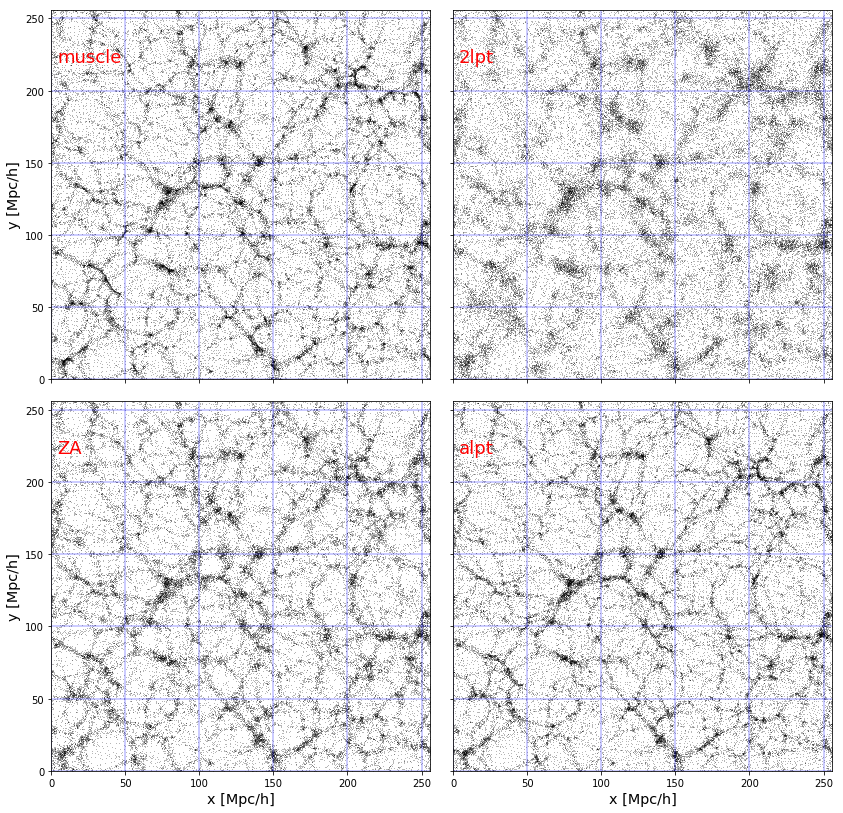

In [5]:
fig,ax = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(7*2,7*2),gridspec_kw={'wspace':0.06,'hspace':0.06})

ax.flat[0].set_ylabel('y [Mpc/h]',fontsize='x-large')
ax.flat[0].scatter(posmuscle[0][:,:,ng/2].flatten(),posmuscle[1][:,:,ng/2].flatten(),s=.2,lw=0.,color='black')
ax.flat[0].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[0].set_xlim([0,boxsize])
ax.flat[0].set_ylim([0,boxsize])
ax.flat[0].text(4, 220,"muscle", color="r",fontsize=18)

ax.flat[1].scatter(pos2lpt[0][:,:,ng/2].flatten(),pos2lpt[1][:,:,ng/2].flatten(),s=.2,lw=0.,color='black')
ax.flat[1].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[1].set_xlim([0,boxsize])
ax.flat[1].set_ylim([0,boxsize])
ax.flat[1].text(4, 220,"2lpt", color="r",fontsize=18)

ax.flat[2].set_xlabel('x [Mpc/h]',fontsize='x-large')
ax.flat[2].set_ylabel('y [Mpc/h]',fontsize='x-large')

ax.flat[2].scatter(poszeld[0][:,:,ng/2].flatten(),poszeld[1][:,:,ng/2].flatten(),s=.2,lw=0.,color='black')
ax.flat[2].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[2].set_xlim([0,boxsize])
ax.flat[2].set_ylim([0,boxsize])
ax.flat[2].text(4, 220,"ZA", color="r",fontsize=18)

ax.flat[3].set_xlabel('x [Mpc/h]',fontsize='x-large')

ax.flat[3].scatter(posalpt[0][:,:,ng/2].flatten(),posalpt[1][:,:,ng/2].flatten(),s=.2,lw=0.,color='black')
ax.flat[3].grid(color='blue', linestyle='-', linewidth=0.4)
ax.flat[0].set_xlim([0,boxsize])
ax.flat[3].set_ylim([0,boxsize])
ax.flat[3].text(4, 220,"alpt", color="r",fontsize=18)
plt.show()

we can also save the positions in a Gadget format binaries by setting return_pos to False

In [6]:
twolpt = lpt.lpt(scheme='2lpt',z_pk=50,boxsize=boxsize,ng=ng,exact_pk=True,redshift=0.,seed=1618,return_pos=False)
pos2lpt = twolpt.generate()

using 2lpt
written binaries in /home/federico/Documenti/PhD/LSS/HMUSCLE/sims/bx256_ng256_z0.0_Om0.30/2lpt/z0__0.dat


In [8]:
import pygadgetreader
pos = pygadgetreader.readsnap('/home/federico/Documenti/PhD/LSS/HMUSCLE/sims/bx256_ng256_z0.0_Om0.30/2lpt/z0__0.dat', 'pos','dm')
pos = np.reshape(pos,(ng,ng,ng,3))
pos = np.rollaxis(pos,-1)

Returning DM    Positions


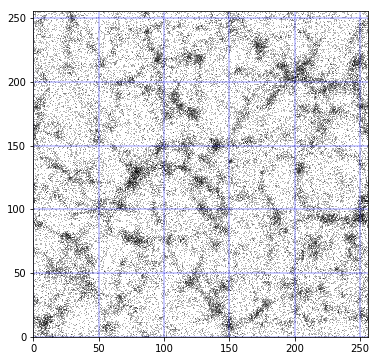

In [9]:
plt.figure(1,figsize=(6,6))
plt.scatter(pos[0][:,:,ng/2].flatten(),pos[1][:,:,ng/2].flatten(),s=.2,lw=0.,color='black')
plt.grid(color='blue', linestyle='-', linewidth=0.4)
plt.xlim([0,boxsize])
plt.ylim([0,boxsize])
plt.show()

In [6]:
import utils
k_xk2lpt = utils.getXk(nkbins=30,pos=pos2lpt,path_to_file2='/home/federico/Documenti/PhD/LSS/HMUSCLE/sims/bx256_ng256_z50.0_Om0.30/Gadget/IC_2lpt_z50_008')

k_xkmuscle = utils.getXk(nkbins=30,pos=posmuscle,path_to_file2='/home/federico/Documenti/PhD/LSS/HMUSCLE/sims/bx256_ng256_z50.0_Om0.30/Gadget/IC_2lpt_z50_008')

k_xkzeld = utils.getXk(nkbins=30,pos=poszeld,path_to_file2='/home/federico/Documenti/PhD/LSS/HMUSCLE/sims/bx256_ng256_z50.0_Om0.30/Gadget/IC_2lpt_z50_008')

k_xkalpt = utils.getXk(nkbins=30,pos=posalpt,path_to_file2='/home/federico/Documenti/PhD/LSS/HMUSCLE/sims/bx256_ng256_z50.0_Om0.30/Gadget/IC_2lpt_z50_008')

Returning DM    Positions
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Particle IDs


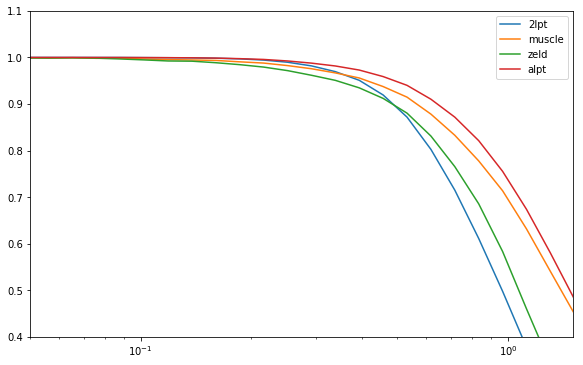

In [7]:
plt.figure(1,figsize=(1.62*6,6))
plt.semilogx(k_xk2lpt[0],k_xk2lpt[1],label='2lpt')
plt.semilogx(k_xkmuscle[0],k_xkmuscle[1],label='muscle')
plt.semilogx(k_xkzeld[0],k_xkzeld[1],label='zeld')
plt.semilogx(k_xkalpt[0],k_xkalpt[1],label='alpt')
plt.ylim([0.4,1.1])
plt.xlim([0.05,1.5])
plt.legend()
plt.show()